# Προγραμματιστική Εργασία Στην Αριθμητική Ανάλυση 2023

###  Ονοματεπώνυμο: Λιόλιος Αναστάσιος 
###  ΑΕΜ: 9171
###  Email: lioliosaa@ece.auth.gr

### Παραγοντοποιήσεις LU και QR
Παρακάτω παρουσιάζονται οι δύο συναρτήσεις LUmine που δέχεται ως είσοδο έναν τετραγωνικό πίνακα Α και εξάγει έναν κάτω τριγωνικό πίνακα L και έναν άνω τριγωνικό πίνακα U τέτοιους ώστε A = LU και η QRmine που υλοποιεί την παραγοντοποίηση QR με την μέθοδο Gram-Schmidt.

In [158]:
import numpy as np

In [114]:
def LUmine(A):
    n = A.shape[0] # A array's dimension
    L = np.matrix(np.identity(n)) 
    U = A
    for j in range(0, n - 1):
        for i in range(j + 1, n):
            mult = A[i, j] / A[j, j]
            A[i, j + 1:n] = A[i, j + 1:n] - mult * A[j, j + 1:n]
            U[i, j + 1:n] = A[i, j + 1:n]
            L[i, j] = mult
            U[i, j] = 0
    return L, U

In [108]:
def QRmine(A):
    n, m= A.shape
    Q = np.empty((n, n)) # initialize matrix Q
    q = np.empty((n, n)) # initialize matrix u

    q[:, 0] = A[:, 0]
    Q[:, 0] = q[:, 0] / np.linalg.norm(q[:, 0])

    for i in range(1, n):

        q[:, i] = A[:, i]
        for j in range(i):
            q[:, i] -= (A[:, i] @ Q[:, j]) * Q[:, j] # get each q vector

        Q[:, i] = q[:, i] / np.linalg.norm(q[:, i]) # compute each e vetor

    R = np.zeros((n, m))
    for i in range(n):
        for j in range(i, m):
            R[i, j] = A[:, j] @ Q[:, i]

    return Q, R


### Πίνακες Hilbert
##### Πρώτο Ερώτημα
Η παρακάτω συνάρτηση υλοποιεί τη δημιουργία ενός πίνακα Hilbert nxn έχοντας ως είσοδο τη διάσταση n.

In [116]:
def Hilbert_array(n):
    return np.array([[1 / (i + j + 1) for j in range(n)] for i in range(n)])

In [117]:
# Example
Hilbert_array(4)

array([[1.        , 0.5       , 0.33333333, 0.25      ],
       [0.5       , 0.33333333, 0.25      , 0.2       ],
       [0.33333333, 0.25      , 0.2       , 0.16666667],
       [0.25      , 0.2       , 0.16666667, 0.14285714]])

##### Δεύτερο Ερώτημα

In [142]:
# Solve with LU
n = 5
H = Hilbert_array(n)
H
b = np.ones((n, 1))
L, U = LUmine(H)
y = np.linalg.solve(L, b)
x = np.linalg.solve(U, y)
x

array([[    5.],
       [ -120.],
       [  630.],
       [-1120.],
       [  630.]])

In [141]:
# Solve with QR
n = 5
H = Hilbert_array(n)
H
b = np.ones((n, 1))
Q, R = QRmine(H)
x_qr = np.linalg.solve(R,np.dot(Q.T, b))
x_qr

array([[    5.00014539],
       [ -120.00275055],
       [  630.01193741],
       [-1120.01810042],
       [  630.00887927]])

#### Τρίτο Ερώτημα
Όπως περίμεναμε το σφάλμα είναι αρκετά μικρό με την αλλαγή που βάλαμε και στις δύο περιπτώσεις των επιλύσεων με παραγοντοποίηση. Νομίζω πως ήταν αναμενόμενο με μια γρήγορη σκέψη.

In [132]:
### solve with LU 
n = 5
H = Hilbert_array(n)
b_new = np.ones((n, 1))
b_new[0] += 10**(-15)
L, U = LUmine(H)
y_new = np.linalg.solve(L, b_new)
x_new = np.linalg.solve(U, y_new)
np.max(np.abs(x_lu - x_new))



7.503331289626658e-12

In [134]:
### solve with QR
n = 5
H = Hilbert_array(n)
b_new = np.ones((n, 1))
b_new[0] += 10**(-15)
Q, R = adjust_sign(*QRmine(H))
x_qr_new = np.linalg.solve(R,np.dot(Q.T, b_new))
x_qr_new
np.max(np.abs(x_qr - x_qr_new))

6.821210263296962e-13

#### Τέταρτο  Ερώτημα
Παρατηρούμε ότι το σφάλμα στην περίπτωση επίλυσης με QR παραγοντοποποίηση είναι πολύ μικρότερο σε σχέση με την επίλυση με LU για διάφορες τιμές του n (0 εώς 100). Πιο συγκεκριμένα, το σφάλμα στην QR επίλυση είναι της τάξης του 10^-9 ενώ το σφάλμα με LU πάρα πολύ μεγαλύτερης τάξης.

In [135]:
error = np.zeros((100, 1))

for n in range(1, 101):
    H = Hilbert_array(n)
    b = np.ones((n, 1))
    b_new = np.ones((n, 1))
    b_new[0] += 10**(-15)
    L, U = LUmine(H)
    y = np.linalg.solve(L, b)
    x = np.linalg.solve(U, y)
    y_new = np.linalg.solve(L, b_new)
    x_new = np.linalg.solve(U, y_new)
    error[n-1] = np.max(np.abs(x - x_new))
    

In [136]:
error_qr = np.zeros((100, 1))

for n in range(1, 101):
    H = Hilbert_array(n)
    b = np.ones((n, 1))
    b_new = np.ones((n, 1))
    b_new[0] += 10**(-15)
    Q, R = adjust_sign(*QRmine(H))
    x_qr = np.linalg.solve(R,np.dot(Q.T, b))
    x_qr_new = np.linalg.solve(R,np.dot(Q.T, b_new))
    error_qr[n-1] = np.max(np.abs(x_qr - x_qr_new))

<function matplotlib.pyplot.show(close=None, block=None)>

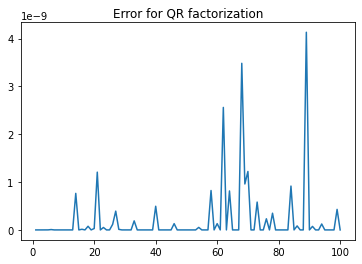

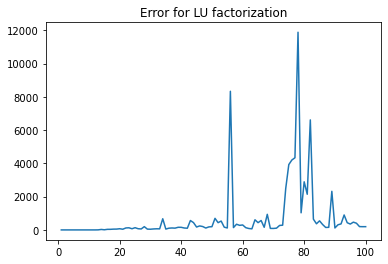

In [143]:
import matplotlib.pyplot as plt
n = [i for i in range(1, 101)]
plt.figure(1)
plt.plot(n, error_qr)
plt.title("Error for QR factorization")
plt.show
plt.figure(2)
plt.title("Error for LU factorization")
plt.plot(n, error)
plt.show

##### Πέμπτο Ερώτημα
Παρατηρούμε ότι μετά από διάσταση n = 40 έχουμε αρκετά αισθητό σφάλμα σε κάποιες περιπτώσεις. Αυτό σημαίνει ότι για τους πίνακες Hilbert η αντιστρεψιμότητα δεν είναι και τόσο καθαρή ιδιότητα τους όσο n->άπειρο.

<function matplotlib.pyplot.show(close=None, block=None)>

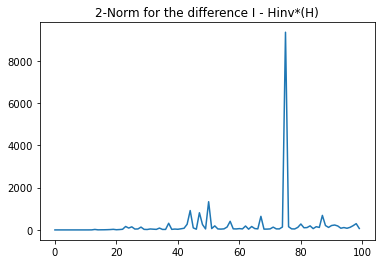

In [167]:
norm2 = np.zeros((100, 1))
for n in range(1, 101):
    H = Hilbert_array(n)
    I = np.identity(n)
    I_h = np.dot(H, np.linalg.inv(H))
    diff = I - I_h 
    norm2[n - 1] = np.linalg.norm(diff)
    
plt.plot(norm2)
plt.title("2-Norm for the difference I - Hinv*(H)")
plt.show

### Πρόβλημα Πρόσεγγισης

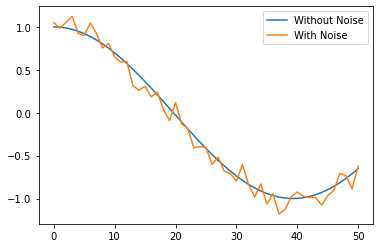

In [202]:
t = np.linspace(0, 1, 51)
np.random.seed(42)
y = np.cos(4 * t) + 0.1 * np.random.randn(t.shape[0])
plt.plot(np.cos(4 * t))
plt.plot(y)
plt.legend(["Without Noise", "With Noise"])
plt.show()

In [203]:
# Least square method
t2 = np.zeros(len(t))
t3 = np.zeros(len(t))
t4 = np.zeros(len(t))
for i in range(len(t)):
    t2[i] = t[i] * t[i]
    t3[i] = t[i] * t[i] * t[i]
    t4[i] = t[i] * t[i] * t[i] * t[i]
    

In [204]:
A = np.vstack([ np.ones(len(t)), t, t2, t3, t4]).T
A_dot = np.dot(A.T, A)
b_dot = np.dot(A.T, y)
b_dot

# Solve with linalg.solve
x1 = np.linalg.solve(A_dot, b_dot)
x1


array([  1.06467848,  -0.14428951, -11.44998595,  12.79089552,
        -2.92626842])

In [206]:
# Solve with LU decomposition
A = np.vstack([ np.ones(len(t)), t, t2, t3, t4]).T
A_dot = np.dot(A.T, A)
b_dot = np.dot(A.T, y)
b_dot

L, U = LUmine(A_dot)
y_dot = np.linalg.solve(L, b_dot)
x2 = np.linalg.solve(U, y_dot)
x2

array([  1.06467848,  -0.14428951, -11.44998595,  12.79089552,
        -2.92626842])

In [207]:
# Solve with LU decomposition
A = np.vstack([ np.ones(len(t)), t, t2, t3, t4]).T
A_dot = np.dot(A.T, A)
b_dot = np.dot(A.T, y)
b_dot

Q, R = QRmine(A_dot)
x3 = np.linalg.solve(R,np.dot(Q.T, b_dot))
x3

array([  1.0646791 ,  -0.14430223, -11.44992959,  12.7908096 ,
        -2.92622629])

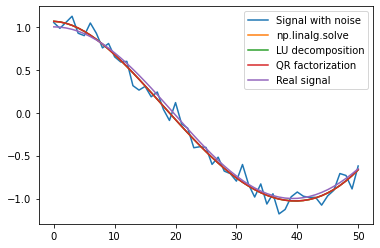

In [216]:
p1 = x1[0] + x1[1] * t + x1[2] * t**2 + x1[3] * t**3 + x1[4] * t**4
p2 = x2[0] + x2[1] * t + x2[2] * t**2 + x2[3] * t**3 + x2[4] * t**4
p3 = x3[0] + x3[1] * t + x3[2] * t**2 + x3[3] * t**3 + x3[4] * t**4

plt.plot(y)
plt.plot(p1)
plt.plot(p2)
plt.plot(p3)
plt.plot(np.cos(4 * t))
plt.legend(["Signal with noise", "np.linalg.solve", "LU decomposition", "QR factorization", "Real signal"])
plt.show()


Παρατηρούμε ότι και με τους τρεις τρόπους το αποτέλεσμα είναι το ίδιο πάνω κάτω. Επίσης, ενώ κάναμε προσέγγιση το σήμα με το θόρυβο που βάλαμε η προσέγγιση είναι ικανοποιητική και για το πραγματικό σήμα χωρίς θόρυβο.